## Backpropagation 

Neural networks have _a lot_ of parameters. Every layer introduces $d_j\cdot d_{j+1}$ parameters for the weight matrix and $d_{j+1}$ parameters for the bias term. The composition of affine functions and nonlinear activations make it impossible to compute the optimum analytically, or to compute the optimum subject to one weight, fixing all the others (the gradients of the nonlinear activations have no inverse function, which is needed to solve the equations given by FONC). The optimization method is crucial for the performance of the neural network and as a result there exist various optimizers that have been applied and developed for neural networks. Typically, neural networks are optimized with a version of gradient descent with momentum. To do so, we need to discuss how to get the gradient of neural networks. 

### Computing the Gradient of a Neural Network
We consider the optimization of our loss function
\begin{align*}
\mathcal{L}(\mathcal{D},\theta) &= \frac{1}{n} \sum_{i=1}^n CE(y_i,f_\theta(\vvec{x}_i))\\
&= -\frac{1}{n} \sum_{i=1}^n \log(f_\theta(\vvec{x}_i)_{y_i}),
\end{align*}
where
\begin{align*}
f_\theta(\vvec{x}_i) & = \softmax(W\vvec{h}^{(L)}+\vvec{b}),
\end{align*}
and the hidden layers are recursively defined 
\begin{align*}
\vvec{h}^{(\ell)} = \phi_{\ell}(W^{(\ell)}\vvec{h}^{(\ell-1)}+\vvec{b}^{(\ell)}).
\end{align*}
The layer-wise definition of a neural network is helpful to compute the gradient of the loss with the chain rule. This motivates the so-called **backpropagation algorithm** that is in essence an efficiently implementation of the chain rule. Let's have a look how we would apply the chain rule to the loss function above. First, we notice that the gradient subject to $\theta$ gathers all partial derivatives subject to all parameters, that is
\begin{align*}
\nabla_\theta \mathcal{L}(\mathcal{D},\theta) = \begin{pmatrix}\frac{\partial}{\partial W_{11}}\mathcal{L}(\mathcal{D},\theta)\\
\vdots \\
\frac{\partial}{\partial W_{cd_L}}\mathcal{L}(\mathcal{D},\theta)\\
\frac{\partial}{\partial b_1}\mathcal{L}(\mathcal{D},\theta)\\
\vdots\\
\frac{\partial}{\partial b_c}\mathcal{L}(\mathcal{D},\theta)\\
\frac{\partial}{\partial W^{(L)}_{11}}\mathcal{L}(\mathcal{D},\theta)\\
\vdots\\
\frac{\partial}{\partial b^{(1)}_{d_1}}\mathcal{L}(\mathcal{D},\theta)\\
\end{pmatrix}.
\end{align*}
Let's have a look how we can determine the partial derivative of the loss subject to weight matrix entry $W^{(\ell)}_{kj}$.
\begin{align*}
\frac{\partial}{\partial W^{(\ell)}_{kj}}\mathcal{L}(\mathcal{D},\theta) & = \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial W^{(\ell)}_{kj}} CE(y_i,f_\theta(\vvec{x}_i))
\end{align*}
We have a look at the partial derivative of the cross entropy and apply the chain rule to _go back_ from the cross entropy loss, that is applied to the output layer, to the layer where we find the weight $W^{(\ell)}_{kj}$:
\begin{align*}
&\frac{\partial}{\partial W^{(\ell)}_{kj}} CE(y_i,f_\theta(\vvec{x}_i))\\ 
&=  \frac{\partial CE(y_i,f_\theta(\vvec{x}_i))}{\partial h^{(L)}}  \frac{\partial h^{(L)}}{\partial W^{(\ell)}_{kj}}\\
&=  \frac{\partial CE(y_i,f_\theta(\vvec{x}_i))}{\partial h^{(L)}}  \frac{\partial \phi_l(W^{(L)}h^{(L-1)}+\vvec{b}^{(L)})}{\partial W^{(\ell)}_{kj}}\\
&=  \frac{\partial CE(y_i,f_\theta(\vvec{x}_i))}{\partial h^{(L)}}  \frac{\partial \phi_L(W^{(L)}h^{(L-1)}+\vvec{b}^{(L)})}{\partial W^{(L)}h^{(L-1)}+\vvec{b}^{(L)}}\frac{\partial W^{(L)}h^{(L-1)}+\vvec{b}^{(L)}}{\partial W^{(\ell)}_{kj}}\\
&=\ldots\\
&=  \frac{\partial CE(y_i,f_\theta(\vvec{x}_i))}{\partial h^{(L)}}  \frac{\partial \phi_L(W^{(L)}h^{(L-1)}+\vvec{b}^{(L)})}{\partial W^{(L)}h^{(L-1)}+\vvec{b}^{(L)}}\frac{\partial W^{(L)}h^{(L-1)}+\vvec{b}^{(L)}}{\partial \vvec{h}^{(L-1)}}\cdot\ldots\cdot \frac{\partial W^{(\ell)}h^{(\ell-1)}+\vvec{b}^{(\ell)}}{\partial W^{(\ell)}_{kj}}.
\end{align*}
We can see how the gradient multiplies the Jacobians of each activation and the affine function of each layer. Hence, if we know the derivatives of the activations, then we can compute the Jacobian. We also observe how we go from the output layer of the network to the front of the network where the weight $W^{(\ell)}_{kj}$ is. This is why it's called backpropagation, we propagate backwards the partial derivatives (Jacobians) of the layers and multiply them.      

In order to compute the partial derivatives with the chain rule, we need to know now how to compute the derivatives subject to the layer components, such that we can multiply everything well together.
#### Derivative of the Cross Entropy Loss
The cross-entropy loss has a compact representation of the derivative subject to the last hidden layer output.  
```{prf:lemma}
The partial derivatives of the cross-entropy function, applied to a function $f(\vvec{h})=\softmax(W\vvec{h}+\vvec{b})$ that returns the softmax of an affine function 
$$CE(y,f(\vvec{h})) = -\log(\softmax(W\vvec{h}+\vvec{b})_y)$$
are given by 
$$\frac{\partial CE(y,f(\vvec{x}))}{\partial h_j} = \begin{cases}f(\vvec{h})_j -1 & \text{ if }j=y\\f(\vvec{h})_j & \text{ otherwise}\end{cases}$$
```
#### Derivatives of Affine Functions
We already know the Jacobian of the affine functions subject to the hidden layer outputs (see the Optimization exercises):
$$\frac{\partial W\vvec{h} +\vvec{b}}{\partial \vvec{h} } = W^\top$$
Based on this insight, we can derive the Jacobian of the affine function subject to the bias vector:
$$\frac{\partial W\vvec{h} +\vvec{b}}{\partial \vvec{b} } = I.$$
Likewise, we can derive the Jacobian of the affine function subject to a weight matrix entry $W_{kj}$:
$$\frac{\partial W\vvec{h} +\vvec{b}}{\partial W_{kj}} = \begin{pmatrix}0\\\vdots\\ h_j\\ \vdots\\ 0\end{pmatrix}$$
#### Derivatives of Activations
```{prf:lemma}
The (sub-)derivative of the $ReLU(x)=\max\{x,0\}$ function is
$$ReLU'(x) = \begin{cases}1& \text{ if }x>0\\
[0,1]& \text{ if }x=0\\
0& \text{ if }x<0\end{cases}.$$
```
```{note} 
Although the derivative of ReLU does not exist strictly speaking, practical implementations gloss over this fact and set
$$ReLU'(x) = \begin{cases}1& \text{ if }x>0\\
0& \text{ if }x\leq 0\end{cases}.$$
In practice, this doesn't affect performance and it makes the computation of gradients consistent. 
```
Correspondingly, we obtain as the Jacobian of the element-wise applied activation function a diagonal matrix (see {numref}`jacob_element_wise_func`) 
```{prf:corollary}
The Jacobian of the ReLU activation subject to a vector $\vvec{x}\in\mathbb{R}^d$ is given as
$$\frac{\partial ReLU(\vvec{x})}{\partial\vvec{x}}=\diag(ReLU'(x_1),\ldots,ReLU'(x_d))$$
```
### Training a Neural Network in Pytorch
We use the automatic differentiation in Pytorch to train our MLP from the previous section on the two moons data. We choose a dimensionality of $d_2=2$ of the last hidden layer, such that we can inspect the learned representation learned for this example. The function `train_model` performs 1000 gradient descent steps with momentum. The gradient descent steps are implemented by `optimizer.step()`. Computing the loss and running `loss.backward()` computes the gradient that is then used by the optimizer.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cm_0 = LinearSegmentedColormap.from_list("mycmap", ["#ffffff","#a0c3ff"])


# Generate and prepare data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Two hidden layers: input -> hidden -> 2D latent -> output
class TwoHiddenLayerNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 264)
        self.latent = nn.Linear(264, 2)
        self.output = nn.Linear(2, 2)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        z = torch.relu(self.latent(x))
        return self.output(z)

    def get_latent(self, x):
        x = torch.relu(self.hidden(x))
        return self.latent(x)


# Training function
def train_model(model, X, y, t_max=1000, lr=0.01, momentum=0.99):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    loss_fn = nn.CrossEntropyLoss()

    for t in range(t_max):
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        if t%100==0: #print
            _ , predicted = output.max(1)
            correct = predicted.eq(y).sum().item()
            print('Iter %i | Loss: %.3f | Train Acc: %.3f%%'% (t,loss, 100.*correct/y.shape[0]))
        loss.backward()
        optimizer.step()
    return model


# Train and plot
model = train_model(TwoHiddenLayerNet(), X_train_tensor, y_train_tensor)

Iter 0 | Loss: 0.715 | Train Acc: 42.750%
Iter 100 | Loss: 0.388 | Train Acc: 88.000%
Iter 200 | Loss: 0.280 | Train Acc: 87.500%
Iter 300 | Loss: 0.120 | Train Acc: 95.750%


Iter 400 | Loss: 0.086 | Train Acc: 96.875%
Iter 500 | Loss: 0.070 | Train Acc: 97.500%
Iter 600 | Loss: 0.065 | Train Acc: 98.125%
Iter 700 | Loss: 0.062 | Train Acc: 97.625%


Iter 800 | Loss: 0.060 | Train Acc: 97.875%
Iter 900 | Loss: 0.059 | Train Acc: 97.375%


We inspect the representations learned below. On the left you see the classification confidences returned by softmax in the original space. Most runs of the optimization procedure yield a suitable classification boundary that reflects the curves between the two moons well. On the right you see the representation in the transformed feature space where the points are linearly separable.

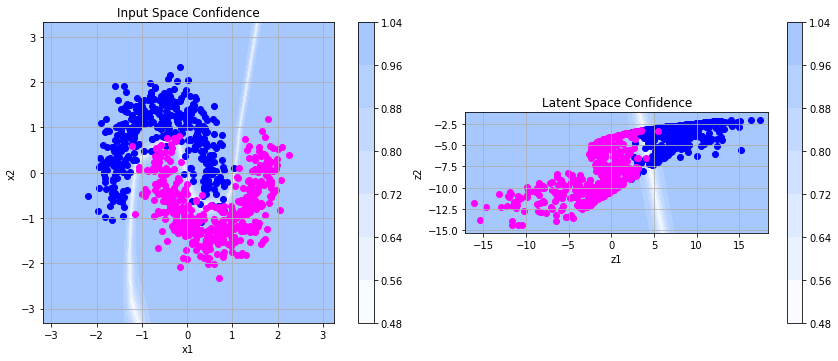

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

def plot_latent_and_input(model, X, y, cm_0, title=""):
    model.eval()
    with torch.no_grad():
        Z = model.get_latent(X).numpy()
        X_np = X.numpy()
        y_np = y.numpy()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ----------------------
    # Plot in latent space
    # ----------------------
    ax = axes[1]
    d, c = 2, 2
    x_ = np.arange(Z[:, 0].min()-1, Z[:, 0].max()+1, 0.02)
    y_ = np.arange(Z[:, 1].min()-1, Z[:, 1].max()+1, 0.02)
    xx, yy = np.meshgrid(x_, y_)
    XY = np.c_[xx.ravel(), yy.ravel()]

    with torch.no_grad():
        logits_latent = model.output(torch.tensor(XY, dtype=torch.float32))
        conf_latent = F.softmax(logits_latent, dim=1).numpy().T
    conf_latent = conf_latent.reshape(c, len(y_), len(x_))

    ax.contourf(x_, y_, conf_latent.max(axis=0), cmap=cm_0)
    fig.colorbar(ax.contourf(x_, y_, conf_latent.max(axis=0), cmap=cm_0), ax=ax)

    ax.set_title("Latent Space Confidence")
    ax.scatter(Z[y_np==0, 0], Z[y_np==0, 1], c='blue', label='Class 0')
    ax.scatter(Z[y_np==1, 0], Z[y_np==1, 1], c='magenta', label='Class 1')
    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.axis('scaled')
    ax.grid(True)
    
    # ----------------------
    # Plot in input space
    # ----------------------
    ax = axes[0]
    x_ = np.arange(X_np[:, 0].min()-1, X_np[:, 0].max()+1, 0.02)
    y_ = np.arange(X_np[:, 1].min()-1, X_np[:, 1].max()+1, 0.02)
    xx, yy = np.meshgrid(x_, y_)
    XY_input = np.c_[xx.ravel(), yy.ravel()]
    with torch.no_grad():
        logits_input = model(torch.tensor(XY_input, dtype=torch.float32))
        conf_input = F.softmax(logits_input, dim=1).numpy().T
    conf_input = conf_input.reshape(c, len(y_), len(x_))

    ax.contourf(x_, y_, conf_input.max(axis=0), cmap=cm_0)
    fig.colorbar(ax.contourf(x_, y_, conf_input.max(axis=0), cmap=cm_0), ax=ax)

    ax.set_title("Input Space Confidence")
    ax.scatter(X_np[y_np==0, 0], X_np[y_np==0, 1], c='blue', label='Class 0')
    ax.scatter(X_np[y_np==1, 0], X_np[y_np==1, 1], c='magenta', label='Class 1')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.axis('scaled')
    ax.grid(True)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
plot_latent_and_input(model, X_train_tensor, y_train_tensor, cm_0)